In [12]:
# To install Kaggle CLI
!pip install kaggle --quiet

import json
kaggle_token = {
    "username": "lloydugwu",
    "key": "d1a6d7a8d5204b825e04ac652cc339fb"
}

!mkdir -p ~/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(kaggle_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [13]:
!kaggle datasets download -d airbnb/seattle

#  to Unzip dataset
!unzip seattle.zip

print("Airbnb dataset downloaded and extracted.")

Dataset URL: https://www.kaggle.com/datasets/airbnb/seattle
License(s): CC0-1.0
seattle.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  seattle.zip
replace calendar.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace listings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace reviews.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Airbnb dataset downloaded and extracted.


In [14]:
import pandas as pd

df = pd.read_csv('listings.csv')
print("Dataset loaded. Shape:", df.shape)
df.head()

Dataset loaded. Shape: (3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [15]:
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

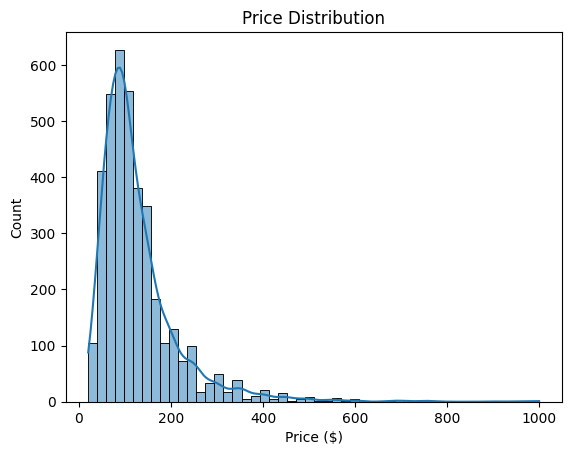

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df['price'].str.replace('$','').str.replace(',','').astype(float), bins=50, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.show()

In [17]:
df['price'] = df['price'].str.replace('$','').str.replace(',','').astype(float)

features = ['bedrooms', 'bathrooms', 'accommodates', 'number_of_reviews', 'review_scores_rating']
df_model = df[features + ['price']].dropna()

print("Data set is now clean! shape:", df_model.shape)
df_model.head()

Data set is now clean! shape: (3153, 6)


,bedrooms,bathrooms,accommodates,number_of_reviews,review_scores_rating,price
0,1.0,1.0,4,207,95.0,85.0
1,1.0,1.0,4,43,96.0,150.0
2,5.0,4.5,11,20,97.0,975.0
4,3.0,2.0,6,38,92.0,450.0
5,1.0,1.0,2,17,95.0,120.0


In [18]:
X = df_model[features]
y = df_model['price']

# Split data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Train-test split has been completed.")

Train-test split has been completed.


In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print("Linear Regression model has been trained.")

Linear Regression model has been trained.


In [20]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error: 4264.64
R-squared Score: 0.53


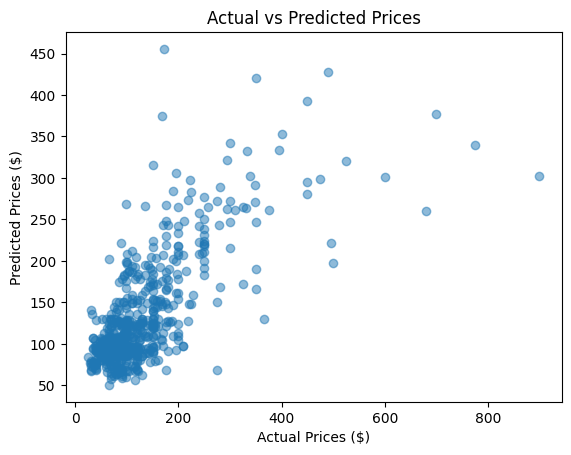

In [21]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices ($)")
plt.ylabel("Predicted Prices ($)")
plt.title("Actual vs Predicted Prices")
plt.show()

In [22]:
sample = pd.DataFrame({
    'bedrooms': [2],
    'bathrooms': [1],
    'accommodates': [4],
    'number_of_reviews': [50],
    'review_scores_rating': [95]
})
predicted_price = lr.predict(sample)[0]
print(f"Predicted Airbnb price: ${predicted_price:.2f}")

Predicted Airbnb price: $145.28
